In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Timestamp
import warnings
warnings.filterwarnings("ignore")
import sklearn

In [2]:
AFCONGoals = pd.read_csv(r"C:\Users\Biggest\Downloads\Copy of AFCON DATASET.xlsx - AFCON GOALS BY YEAR AND COUNTRY.csv")

In [3]:
AFCONCountryAppearance = pd.read_csv(r"C:\Users\Biggest\Downloads\Copy of AFCON DATASET.xlsx - AFCON BY COUNTRY.csv")

In [4]:
AFCON_TopScorers = pd.read_csv(r"C:\Users\Biggest\Downloads\Copy of AFCON DATASET.xlsx - AFCON TOP GOALSCORERES.csv")

In [5]:
NumberOfGames = pd.read_csv(r"C:\Users\Biggest\Downloads\Copy of AFCON DATASET.xlsx - NUMBER OF AFCON GAMES.csv")

In [72]:
AFCONCountryAppearance.tail()

,TEAM,MATCH PLAYED,WINS,DRAWS,LOSSES,GOAL FOR,GOAL AGAINST
49,Togo,25.0,3.0,8.0,14.0,18.0,39.0
50,Tunisia,80.0,25.0,29.0,26.0,99.0,94.0
51,Uganda,23.0,4.0,3.0,16.0,21.0,38.0
52,Zambia,66.0,27.0,18.0,22.0,81.0,67.0
53,Zimbabwe,15.0,3.0,2.0,10.0,16.0,31.0


In [ ]:
AFCONCountryAppearance = AFCONCountryAppearance.drop(AFCONCountryAppearance.index[54])



In [7]:
AFCONCountryAppearance.nunique()

TEAM            55
MATCH PLAYED    33
WINS            21
DRAWS           22
LOSSES          23
GOAL FOR        35
GOAL AGAINST    34
OWN GOAL         0
PENALTY GOAL     0
dtype: int64

# OBSERVATIONS;

 * There's no record for OWN GOAL and PENALTY GOAL in the dataset, hence, we will drop the colunm from our analysis

In [8]:
# dropping unwanted variables/columns

AFCONCountryAppearance = AFCONCountryAppearance.drop(['OWN GOAL', 'PENALTY GOAL'], axis = 1)

In [75]:
AFCONCountryAppearance.isnull().sum()

TEAM             0
MATCH PLAYED    10
WINS            10
DRAWS           10
LOSSES          10
GOAL FOR        10
GOAL AGAINST    10
dtype: int64

In [84]:
#Dropping the records with country missing in dataframe.

AFCONCountryAppearance = AFCONCountryAppearance[~AFCONCountryAppearance['MATCH PLAYED'].isnull()].copy()
AFCONCountryAppearance = AFCONCountryAppearance[~AFCONCountryAppearance.WINS.isnull()].copy()
AFCONCountryAppearance = AFCONCountryAppearance[~AFCONCountryAppearance.DRAWS.isnull()].copy()
AFCONCountryAppearance = AFCONCountryAppearance[~AFCONCountryAppearance.LOSSES.isnull()].copy()
AFCONCountryAppearance = AFCONCountryAppearance[~AFCONCountryAppearance['GOAL FOR'].isnull()].copy()
AFCONCountryAppearance = AFCONCountryAppearance[~AFCONCountryAppearance['GOAL AGAINST'].isnull()].copy()



AFCONCountryAppearance.isnull().sum()

TEAM            0
MATCH PLAYED    0
WINS            0
DRAWS           0
LOSSES          0
GOAL FOR        0
GOAL AGAINST    0
dtype: int64

In [9]:
# Printing our new dataset

AFCONCountryAppearance.head()

,TEAM,MATCH PLAYED,WINS,DRAWS,LOSSES,GOAL FOR,GOAL AGAINST
0,Algeria,77.0,28.0,22.0,27.0,94.0,89.0
1,Angola,26.0,4.0,12.0,10.0,30.0,39.0
2,Benin,14.0,0.0,5.0,9.0,7.0,24.0
3,Botswana,3.0,0.0,0.0,3.0,2.0,9.0
4,Burkina Faso,48.0,9.0,16.0,23.0,47.0,72.0


In [10]:
AFCONGoals

,COUNTRIES/EDITIONS,1957,1959,1962,1963,1965,1968,1970,1972,1974,...,2008,2010,2012,2013,2015,2017,2019,2022,2024,TOTAL
0,Algeria,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,...,NaN,4.000000,,2.00000,6.000,5.0000,13.000000,1.000000,NaN,94.0
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.00000,6.000000,4,1.00000,NaN,NaN,1.000000,NaN,NaN,30.0
2,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00000,2.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,7.0
3,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,2,7.00000,1.000,8.0000,NaN,9.000000,NaN,47.0
5,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0
6,Cameroon,NaN,NaN,NaN,NaN,NaN,NaN,7.0000,10.0000,NaN,...,14.00000,6.000000,NaN,NaN,2.000,7.0000,4.000000,14.000000,NaN,137.0
7,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.00000,1.000,NaN,NaN,2.000000,NaN,6.0
8,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,Chad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
AFCONGoals.isnull().sum()

COUNTRIES/EDITIONS     1
1957                  52
1959                  53
1962                  51
1963                  49
1965                  49
1968                  47
1970                  47
1972                  47
1974                  47
1976                  47
1978                  47
1980                  47
1982                  47
1984                  47
1986                  47
1988                  47
1990                  47
1992                  43
1994                  43
1996                  40
1998                  39
2000                  39
2002                  39
2004                  39
2006                  39
2008                  39
2010                  39
2012                  38
2013                  39
2015                  39
2017                  39
2019                  31
2022                  31
2024                  58
TOTAL                  2
dtype: int64

In [12]:
AFCONGoals['COUNTRIES/EDITIONS'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Comoros', 'D. R Congo', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
       'The Gambia', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe',
       'TOTAL', nan, 'GAMES PLAYED', 'Avg.Goals (per match)'],
      dtype=object)

#
the country name is a dirty variable, hence we clean the colunm.

In [ ]:


# dropping the dirty rows

AFCONGoals=AFCONGoals.drop(AFCONGoals.index[54])
AFCONGoals=AFCONGoals.drop(AFCONGoals.index[55])
AFCONGoals=AFCONGoals.drop(AFCONGoals.index[56])
AFCONGoals=AFCONGoals.drop(AFCONGoals.index[57])


In [14]:
AFCONGoals

,COUNTRIES/EDITIONS,1957,1959,1962,1963,1965,1968,1970,1972,1974,...,2008,2010,2012,2013,2015,2017,2019,2022,2024,TOTAL
0,Algeria,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,...,NaN,4.000000,,2.00000,6.000,5.0000,13.000000,1.000000,NaN,94.0
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.00000,6.000000,4,1.00000,NaN,NaN,1.000000,NaN,NaN,30.0
2,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00000,2.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,7.0
3,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,2,7.00000,1.000,8.0000,NaN,9.000000,NaN,47.0
5,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0
6,Cameroon,NaN,NaN,NaN,NaN,NaN,NaN,7.0000,10.0000,NaN,...,14.00000,6.000000,NaN,NaN,2.000,7.0000,4.000000,14.000000,NaN,137.0
7,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.00000,1.000,NaN,NaN,2.000000,NaN,6.0
8,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,Chad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
AFCONGoals.nunique()

COUNTRIES/EDITIONS    55
1957                   4
1959                   3
1962                   5
1963                   5
1965                   6
1968                   7
1970                   9
1972                   6
1974                   8
1976                   5
1978                   7
1980                   7
1982                   6
1984                   8
1986                   8
1988                   6
1990                   7
1992                   7
1994                   9
1996                  10
1998                  11
2000                  12
2002                   8
2004                  10
2006                  11
2008                  12
2010                   9
2012                  10
2013                  11
2015                   9
2017                   8
2019                  12
2022                  11
2024                   0
TOTAL                 34
dtype: int64

# OBSERVATION:

 * There's no record for the year 2024 in the dataset, hence, we will drop the colunm from our analysis.

In [16]:
# dropping unwanted variables/columns

AFCONGoals = AFCONGoals.drop(['2024'], axis = 1)
AFCONGoals.head()

,COUNTRIES/EDITIONS,1957,1959,1962,1963,1965,1968,1970,1972,1974,...,2006,2008,2010,2012,2013,2015,2017,2019,2022,TOTAL
0,Algeria,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,4.0,,2.0,6.0,5.0,13.0,1.0,94.0
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,6.0,4,1.0,NaN,NaN,1.0,NaN,30.0
2,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,NaN,NaN,NaN,3.0,NaN,7.0
3,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2.0
4,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,2,7.0,1.0,8.0,NaN,9.0,47.0


In [17]:
AFCON_TopScorers.head()

,TOP SCORER,EDITIONS,COUNTRY,GOALS,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Mohamed Diab Al-Attar,1957,EGYPT,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
1,Mohamoud El- Gohary,1959,EGYPT,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Mengistu Worku, Badawi Abdel Fatth",1962,"ETHIOPIA, EGYPT",3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hassan El-Shazly,1963,EGYPT,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ben Acheampong,Osei Kofi, Eustache Mangle",1965,"GHANA, IVORY COAST",3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
AFCON_TopScorers.nunique()

TOP SCORER     30
EDITIONS       33
COUNTRY        22
GOALS           8
Unnamed: 4      0
Unnamed: 5      0
Unnamed: 6      0
Unnamed: 7      0
Unnamed: 8      1
Unnamed: 9      1
Unnamed: 10     1
Unnamed: 11     1
Unnamed: 12     1
Unnamed: 13     1
Unnamed: 14     0
Unnamed: 15     0
Unnamed: 16     0
Unnamed: 17     0
Unnamed: 18     0
Unnamed: 19     0
Unnamed: 20     0
Unnamed: 21     0
Unnamed: 22     0
Unnamed: 23     0
Unnamed: 24     0
Unnamed: 25     0
Unnamed: 26     0
Unnamed: 27     0
Unnamed: 28     0
Unnamed: 29     0
Unnamed: 30     0
Unnamed: 31     0
Unnamed: 32     0
Unnamed: 33     1
dtype: int64

# OBSERVATION:

 * The unnamed variables/columns are redundancies in the dataset, hence, we will drop the colunm from our analysis.

In [19]:
# dropping unwanted variables/columns

AFCON_TopScorers = AFCON_TopScorers.drop(AFCON_TopScorers.iloc[: , 4: ], axis = 1)

In [20]:
AFCON_TopScorers.rename(columns={"COUNTRY" : 'COUNTRIES', 'EDITIONS' : 'EDITION'}, inplace=True)

In [21]:
AFCON_TopScorers.head()

,TOP SCORER,EDITION,COUNTRIES,GOALS
0,Mohamed Diab Al-Attar,1957,EGYPT,5
1,Mohamoud El- Gohary,1959,EGYPT,3
2,"Mengistu Worku, Badawi Abdel Fatth",1962,"ETHIOPIA, EGYPT",3
3,Hassan El-Shazly,1963,EGYPT,6
4,"Ben Acheampong,Osei Kofi, Eustache Mangle",1965,"GHANA, IVORY COAST",3


In [22]:
NumberOfGames

,COUNTRIES,1957,1959,1962,1963,1965,1968,1970,1972,1974,...,2008,2010,2012,2013,2015,2017,2019,2021,2024,TOTAL
0,Algeria,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,6.0,NaN,3.0,4.0,3.0,7.0,3.0,NaN,77
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,3.0,3.0,NaN,NaN,3.0,NaN,NaN,26
2,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,14
3,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,3.0,6.0,3.0,6.0,NaN,7.0,NaN,48
5,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3
6,Cameroon,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,...,6.0,4.0,NaN,NaN,3.0,6.0,4.0,7.0,NaN,91
7,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,3.0,NaN,NaN,4.0,NaN,11
8,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,Chad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [23]:
# dropping the dirty rows

NumberOfGames=NumberOfGames.drop(NumberOfGames.index[54])

In [24]:
NumberOfGames.nunique()

COUNTRIES    54
1957          2
1959          1
1962          1
1963          2
1965          2
1968          3
1970          2
1972          2
1974          3
1976          2
1978          2
1980          2
1982          2
1984          2
1986          2
1988          2
1990          2
1992          3
1994          3
1996          4
1998          3
2000          3
2002          3
2004          3
2006          3
2008          3
2010          5
2012          3
2013          3
2015          3
2017          3
2019          4
2021          4
2024          0
TOTAL        33
dtype: int64

# OBSERVATION:

 * There's no record for the year 2024 in the dataset, hence, we will drop the colunm from our analysis.

In [25]:
# dropping unwanted variables/columns

NumberOfGames = NumberOfGames.drop(['2024'], axis = 1)

# OBSERVATION:

For a better analysis we need to merge these datasets into one, to do that, we need to to

 * check similariest between them, 
 * make the variable name alike,
 * then merge the datasets
    
the likelyhood in the datasets include COUNTRY and YEAR/EDITION. hence, we need to melt the datasets with YEARs(variables) into EDiITION COLUNM.

dataset to melt includes 'NumberOfGames' and 'AFCONGoals'

In [26]:
# isolating the last column
total = NumberOfGames['TOTAL']
# dropping it from the real column
NumberOfGames = NumberOfGames.drop(['TOTAL'], axis =1)

In [27]:
# melting dataset 'NumberOfGames'

NOG = NumberOfGames.melt(id_vars = 'COUNTRIES', var_name='EDITION', value_name='NumberOfGame')
NOG

,COUNTRIES,EDITION,NumberOfGame
0,Algeria,1957,NaN
1,Angola,1957,NaN
2,Benin,1957,NaN
3,Botswana,1957,NaN
4,Burkina Faso,1957,NaN
...,...,...,...
1777,Togo,2021,NaN
1778,Tunisia,2021,5.0
1779,Uganda,2021,NaN
1780,Zambia,2021,NaN


# 
to reduce the dataset, we remove the null values from the data set i.e remove the countries and years without number of games.

In [28]:
NOG.isnull().sum()

COUNTRIES          0
EDITION            0
NumberOfGame    1401
dtype: int64

In [29]:
#Dropping the records with missing values in dataframe.
NOG = NOG[~NOG.NumberOfGame.isnull()].copy()

# rechecking for missing values in the dataframe
NOG.isnull().sum()

COUNTRIES       0
EDITION         0
NumberOfGame    0
dtype: int64

In [30]:
NOG.nunique()

COUNTRIES       44
EDITION         33
NumberOfGame     8
dtype: int64

In [31]:
# print new dataset
NOG


,COUNTRIES,EDITION,NumberOfGame
13,Egypt,1957,2.0
17,Ethiopia,1957,1.0
46,Sudan,1957,1.0
67,Egypt,1959,2.0
71,Ethiopia,1959,2.0
...,...,...,...
1770,Sierra Leone,2021,3.0
1774,Sudan,2021,3.0
1776,The Gambia,2021,5.0
1778,Tunisia,2021,5.0


# 
just as we have transformed NUmberOfGames, we'd do the same for AFCONGoals

In [32]:
# dropping total from the AFCONGoals column
AFCONGoals = AFCONGoals.drop(['TOTAL'], axis =1)

In [33]:
# melting dataset 'NumberOfGames'

AGls = AFCONGoals.melt(id_vars = 'COUNTRIES/EDITIONS', var_name='EDITION', value_name='NumberOfGoals')
AGls

,COUNTRIES/EDITIONS,EDITION,NumberOfGoals
0,Algeria,1957,NaN
1,Angola,1957,NaN
2,Benin,1957,NaN
3,Botswana,1957,NaN
4,Burkina Faso,1957,NaN
...,...,...,...
1843,Uganda,2022,NaN
1844,Zambia,2022,NaN
1845,Zimbabwe,2022,3.0
1846,NaN,2022,NaN


#
we have misspelt column on (0), hence, we rename the colunm to match other datasets

In [34]:
# Rename data colunms 

AGls.rename(columns={"COUNTRIES/EDITIONS" : 'COUNTRIES'}, inplace=True)

AGls

,COUNTRIES,EDITION,NumberOfGoals
0,Algeria,1957,NaN
1,Angola,1957,NaN
2,Benin,1957,NaN
3,Botswana,1957,NaN
4,Burkina Faso,1957,NaN
...,...,...,...
1843,Uganda,2022,NaN
1844,Zambia,2022,NaN
1845,Zimbabwe,2022,3.0
1846,NaN,2022,NaN


In [59]:

# dropping the dirty rows

AGls=AGls.drop(AGls.index[413])

In [35]:
AGls.isnull().sum()

COUNTRIES          33
EDITION             0
NumberOfGoals    1434
dtype: int64

In [36]:
#Dropping the records with missing values in dataframe.
AGls = AGls[~AGls.NumberOfGoals.isnull()].copy()

# rechecking for missing values in the dataframe
AGls.isnull().sum()

COUNTRIES        0
EDITION          0
NumberOfGoals    0
dtype: int64

In [37]:
AGls.nunique()

COUNTRIES        45
EDITION          33
NumberOfGoals    55
dtype: int64

In [38]:
# print new data set
AGls

,COUNTRIES,EDITION,NumberOfGoals
13,Egypt,1957,6.0
44,South Africa,1957,0.0
46,Sudan,1957,1.0
55,Avg.Goals (per match),1957,3.5
69,Egypt,1959,6.0
...,...,...,...
1838,Sudan,2022,1.0
1840,The Gambia,2022,4.0
1842,Tunisia,2022,5.0
1845,Zimbabwe,2022,3.0


# OBSERVATION;

The 'COUNTRIES' column for the dataset posesses diffrent case sensitivity(upper = two datasets and lowercase= two dataset). with this diffrence it will be difficult to merge the datasets, hence, we change lower case to upper case.

In [39]:
AGls['COUNTRIES'] = AGls['COUNTRIES'].str.upper()
AGls

,COUNTRIES,EDITION,NumberOfGoals
13,EGYPT,1957,6.0
44,SOUTH AFRICA,1957,0.0
46,SUDAN,1957,1.0
55,AVG.GOALS (PER MATCH),1957,3.5
69,EGYPT,1959,6.0
...,...,...,...
1838,SUDAN,2022,1.0
1840,THE GAMBIA,2022,4.0
1842,TUNISIA,2022,5.0
1845,ZIMBABWE,2022,3.0


In [40]:
NOG['COUNTRIES'] = NOG['COUNTRIES'].str.upper()
NOG

,COUNTRIES,EDITION,NumberOfGame
13,EGYPT,1957,2.0
17,ETHIOPIA,1957,1.0
46,SUDAN,1957,1.0
67,EGYPT,1959,2.0
71,ETHIOPIA,1959,2.0
...,...,...,...
1770,SIERRA LEONE,2021,3.0
1774,SUDAN,2021,3.0
1776,THE GAMBIA,2021,5.0
1778,TUNISIA,2021,5.0


# OBSERVATION:

we can now to proceed to merge the following data;
 * Top scorers
 * Number of games
 * Goals

In [41]:
# define a list of dataframes
dfs = [AFCON_TopScorers,NOG, AGls]
# concatenate them along rows
data = pd.concat(dfs, axis=0)

In [42]:
data

,TOP SCORER,EDITION,COUNTRIES,GOALS,NumberOfGame,NumberOfGoals
0,Mohamed Diab Al-Attar,1957,EGYPT,5.0,NaN,NaN
1,Mohamoud El- Gohary,1959,EGYPT,3.0,NaN,NaN
2,"Mengistu Worku, Badawi Abdel Fatth",1962,"ETHIOPIA, EGYPT",3.0,NaN,NaN
3,Hassan El-Shazly,1963,EGYPT,6.0,NaN,NaN
4,"Ben Acheampong,Osei Kofi, Eustache Mangle",1965,"GHANA, IVORY COAST",3.0,NaN,NaN
...,...,...,...,...,...,...
1838,NaN,2022,SUDAN,NaN,NaN,1.0
1840,NaN,2022,THE GAMBIA,NaN,NaN,4.0
1842,NaN,2022,TUNISIA,NaN,NaN,5.0
1845,NaN,2022,ZIMBABWE,NaN,NaN,3.0


In [ ]:
searchfor = [',']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

# EXPLORATORY DATA ANALYSIS (EDA)

In [43]:
AFCONCountryAppearance.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TEAM,55,55,Algeria,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MATCH PLAYED,45.0,NaN,NaN,NaN,65.911111,218.48984,3.0,8.0,23.0,66.0,1483.0
WINS,45.0,NaN,NaN,NaN,23.688889,79.387663,0.0,1.0,4.0,20.0,533.0
DRAWS,45.0,NaN,NaN,NaN,18.666667,61.890666,0.0,2.0,5.0,18.0,420.0
LOSSES,45.0,NaN,NaN,NaN,23.6,77.847286,1.0,4.0,10.0,19.0,531.0
GOAL FOR,45.0,NaN,NaN,NaN,78.577778,261.822067,0.0,5.0,18.0,78.0,1768.0
GOAL AGAINST,45.0,NaN,NaN,NaN,77.911111,257.320089,3.0,12.0,31.0,67.0,1753.0


# OBSERVATIONS;
 * the highest matches played by a team since the start of the competition is 1483
    - wins = 533
    - draws = 420
    - losses = 531
    - goal for = 1768
    - goal agaist = 1753

In [44]:
AGls.describe(include='all').T

,count,unique,top,freq
COUNTRIES,414,45,AVG.GOALS (PER MATCH),33
EDITION,414,33,2022,25
NumberOfGoals,414.0,55.0,2.0,55.0


# OBSERVATIONS;
 *  Egypt has found the net more than any other team in the first 33 edition of AFCON.
 *  24 diffrent teams found the net in 2022, more than any year since the beginning of the tournament.
 *  54 - the highest numbers of goals scored by a team in the tournament.

In [45]:
NOG.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
COUNTRIES,381,44,EGYPT,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDITION,381,33,2021,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfGame,381.0,NaN,NaN,NaN,3.892388,1.296339,0.0,3.0,3.0,5.0,7.0


# OBSERVATIONS;
 * 24 times - Egypt has featured in the tournament more than any other team.

In [46]:
AFCON_TopScorers.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TOP SCORER,33,30,Rashidi Yekini,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDITION,33.0,NaN,NaN,NaN,1989.757576,19.350437,1957.0,1974.0,1990.0,2006.0,2022.0
COUNTRIES,33,22,EGYPT,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOALS,33.0,NaN,NaN,NaN,4.545455,1.641092,2.0,3.0,4.0,5.0,9.0


# OBSERVATIONS;
 * Egypt has produced 5 different top scorer, more than any other team, in the tournament.
 * Rashidi Yekini has won the afcon top scorer more than any one, winning the award twice.
 * The tournament has produced 33 top scorers so far.

In [47]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TOP SCORER,33,30,Rashidi Yekini,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDITION,828,67,2019,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COUNTRIES,828,58,EGYPT,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOALS,33.0,NaN,NaN,NaN,4.545455,1.641092,2.0,3.0,4.0,5.0,9.0
NumberOfGame,381.0,NaN,NaN,NaN,3.892388,1.296339,0.0,3.0,3.0,5.0,7.0
NumberOfGoals,414.0,55.0,2.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# OBSERVATIONS:
 * Egypt is the most sucessful team of the tournament.

 * 2019 was the most eventful year of the tournament.

# UNIVARIATE ANALYSIS

In [48]:
# separating Numerical and categorical variables for easy analysis

cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['TOP SCORER', 'EDITION', 'COUNTRIES', 'NumberOfGoals'], dtype='object')
Numerical Variables:
['GOALS', 'NumberOfGame']


In [123]:
# plotting categorical graph

fig, axes = plt.subplots(2, 2, figsize = (210, 100))
fig.suptitle('Bar plot for all categorical variables in the dataset') 
sns.countplot(ax = axes[0, 0], x = 'TOP SCORER', data = data, color = 'blue',
              order = data['TOP SCORER'].head(29).value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'EDITION', data = data, color = 'Red', 
              order = data['EDITION'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'COUNTRIES', data = data, color = 'red',
             order = data['COUNTRIES'].head(10).value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'NumberOfGoals', data = data, color = 'blue',
              order = data['NumberOfGoals'].value_counts().index);


axes[0, 0].tick_params(labelrotation=90);
axes[0, 1].tick_params(labelrotation=90);
axes[1, 0].tick_params(labelrotation=90);
axes[1][1].tick_params(labelrotation=90);
plt.rc('font', size=8)
plt.rc('axes', titlesize=100)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=80)
plt.rc('ytick', labelsize=80)
plt.rc('legend', fontsize=80)
plt.rc('figure', titlesize=100)

# BIVARIATE ANALYSIS

In [90]:
# Converting floats[decimal points] into integers[whole numbers], so as to avoid error.

NOG['NumberOfGame'] = NOG['NumberOfGame'].astype(int)
NOG['EDITION'] = NOG['EDITION'].astype(int)
AFCONCountryAppearance = AFCONCountryAppearance.astype({"MATCH PLAYED": 'int', "WINS": 'int',"GOAL AGAINST": 'int', "GOAL FOR": 'int', "LOSSES": 'int', "DRAWS": 'int'})


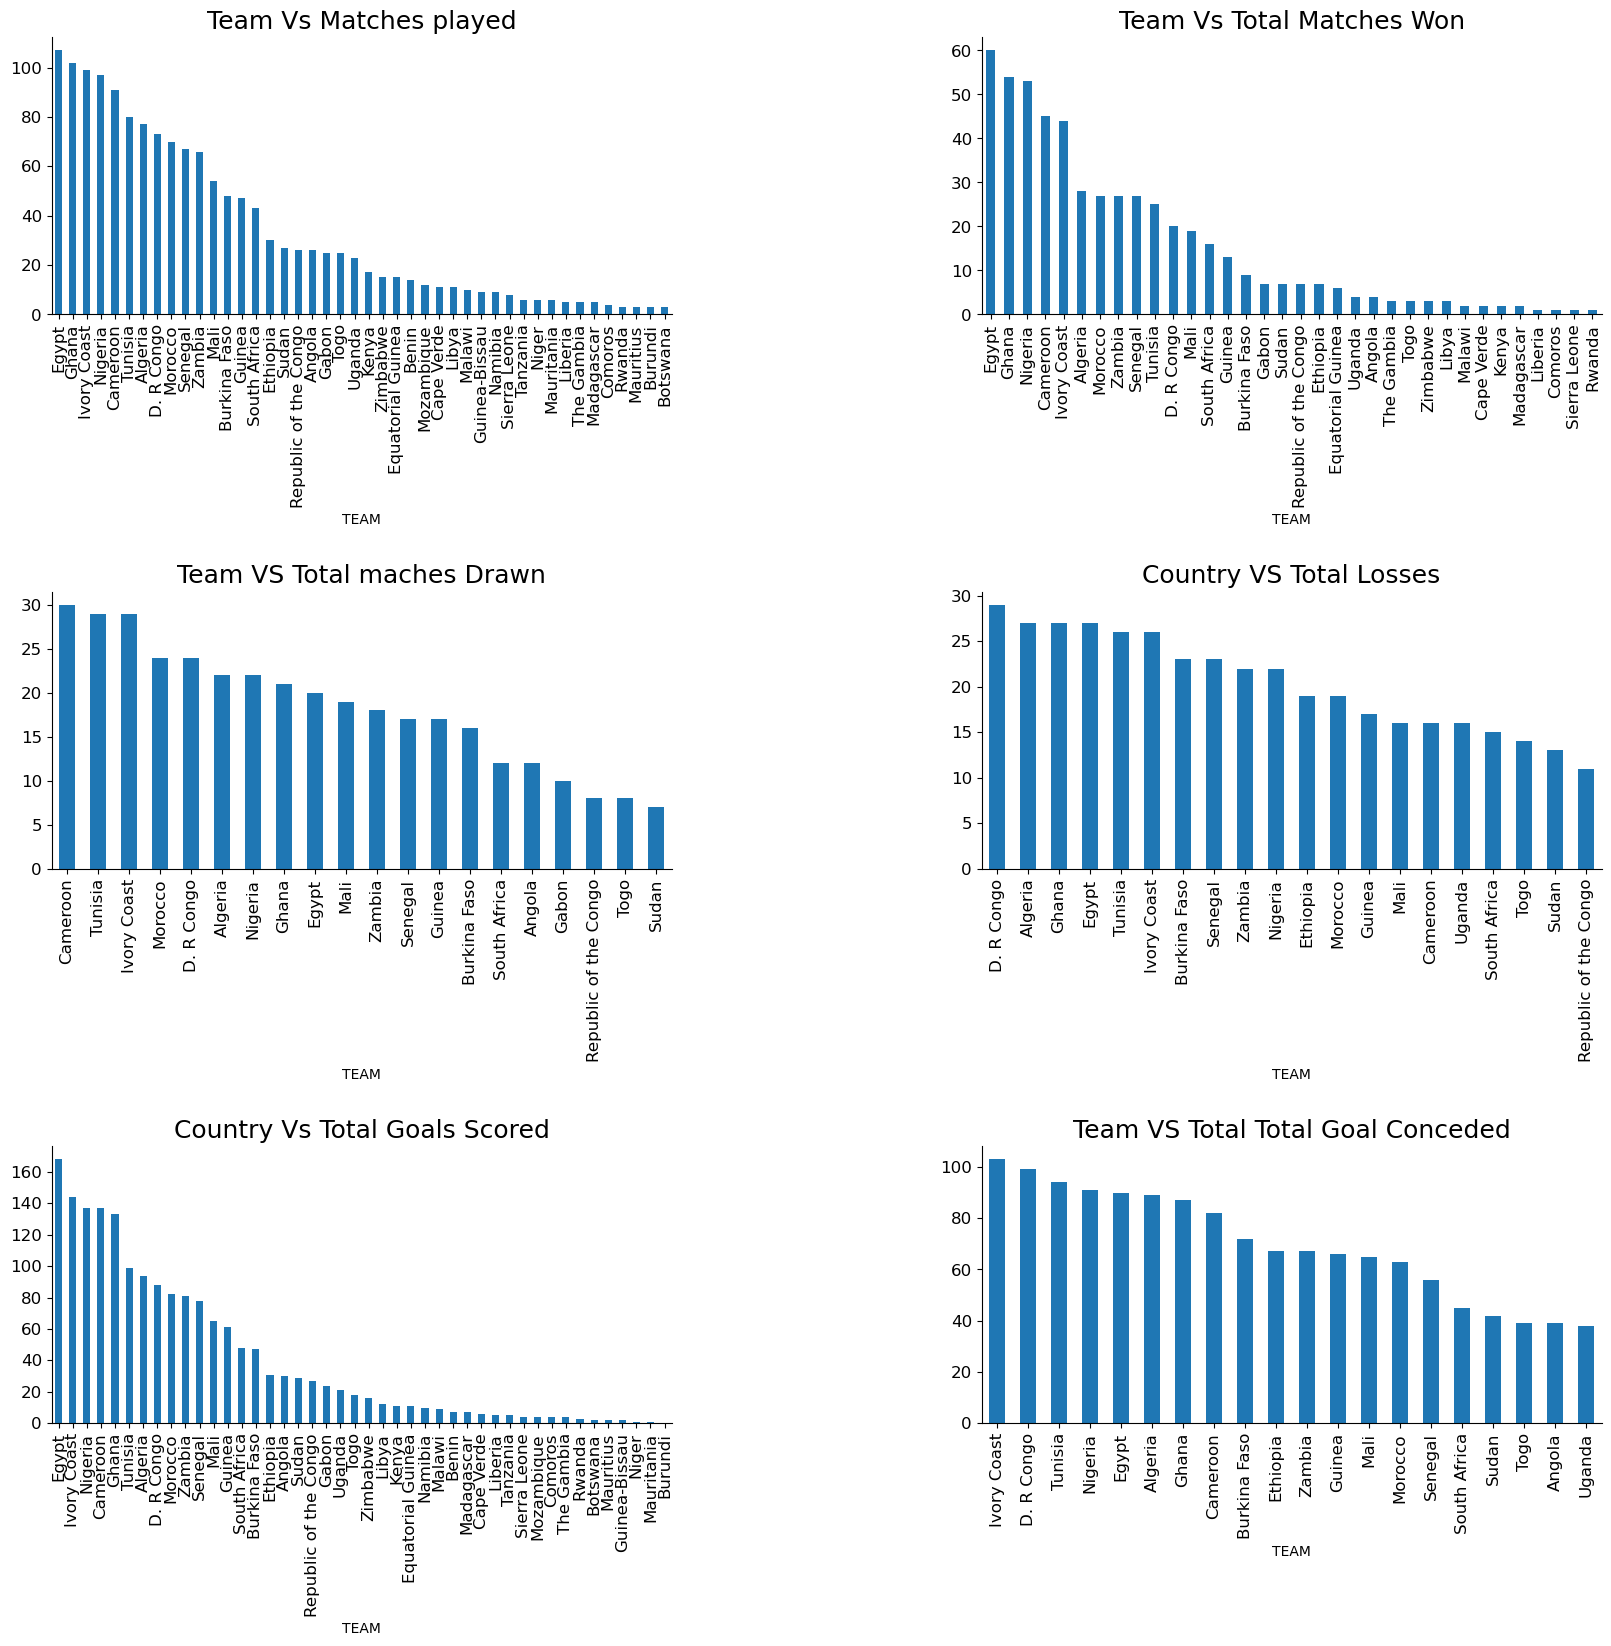

In [103]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 18))
AFCONCountryAppearance.groupby('TEAM')['MATCH PLAYED'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Team Vs Matches played", fontsize=18)
AFCONCountryAppearance.groupby('TEAM')['WINS'].mean().sort_values(ascending=False).head(34).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Team Vs Total Matches Won", fontsize=18)
AFCONCountryAppearance.groupby('TEAM')['DRAWS'].mean().sort_values(ascending=False).head(20).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Team VS Total maches Drawn", fontsize=18)
AFCONCountryAppearance.groupby('TEAM')['LOSSES'].mean().sort_values(ascending=False).head(20).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Country VS Total Losses", fontsize=18)
AFCONCountryAppearance.groupby('TEAM')['GOAL FOR'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Country Vs Total Goals Scored", fontsize=18)
AFCONCountryAppearance.groupby('TEAM')['GOAL AGAINST'].mean().sort_values(ascending=False).head(20).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Team VS Total Total Goal Conceded", fontsize=18)


plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()